In [1]:
from sklearn import datasets, neighbors
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml, load_digits
import matplotlib.pyplot as plt
import numpy as np
from random import randint
import time
import matplotlib

In [2]:
mnist = fetch_openml('mnist_784') #load_digits()

In [3]:
x,y=mnist['data'],mnist['target']

In [4]:
x.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
some_digit=x[1246]
some_digit_image=some_digit.reshape(28,28) #reshaping it to plot it

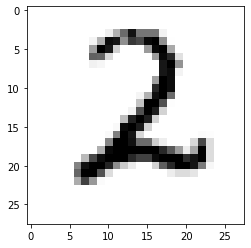

In [7]:
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation="nearest")

In [8]:
x_train=x[:2000]
x_test=x[2000:3000]

In [9]:
y_train=y[:2000]
y_test=y[2000:3000]

In [10]:
shuffle_index=np.random.permutation(2000)
x_train,y_train=x_train[shuffle_index],y_train[shuffle_index]

In [11]:
x_train = x_train.reshape((-1, 28*28))
x_test = x_test.reshape((-1, 28*28))

In [17]:
pics_count = 16




In [18]:
def lets_knn(x_train, y_train, x_test, y_test, n_neighbors, weights='uniform', print_wrong_pred=False):
    t0 = time.time()
    # creating and training knn classifier
    knn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
    knn.fit(x_train, y_train)
    t1 = time.time()

    # predicting classes and comparing them with actual labels
    pred = knn.predict(x_test)
    t2 = time.time()
    # calculating accuracy
    accuracy = round(np.mean(pred == y_test)*100, 1)

    print("Accuracy of", weights ,"KNN with", n_neighbors, "neighbors:", accuracy,"%. Fit in",
          round(t1 - t0, 1), "s. Prediction in", round(t2 - t1, 1), "s")

    # selecting wrong predictions with correct and wrong labels
    wrong_pred = x_test[(pred != y_test)]
    correct_labels = y_test[(pred != y_test)]
    wrong_labels = pred[(pred != y_test)]

    if print_wrong_pred:
        # the we print first 16 of them
        fig = plt.figure()
        fig.suptitle("Incorrect predictions", fontsize=18)
        # in order to print different sized photos, we need to determine to what shape we want to reshape
        size = int(np.sqrt(X_train.shape[1]))
        for n, (digit, wrong_label, correct_label) in enumerate(zip(wrong_pred, wrong_labels, correct_labels)):
            a = fig.add_subplot(4, 4, n + 1)
            plt.imshow(digit.reshape(size,size))
            a.set_title("Correct: " + str(correct_label) + ". Predicted: " + str(wrong_label))
            a.axis('off')
            if n == 15:
                break
        fig.set_size_inches(fig.get_size_inches() * pics_count / 7)
        plt.show()

Accuracy of uniform KNN with 1 neighbors: 90.0 %. Fit in 0.5 s. Prediction in 198.6 s


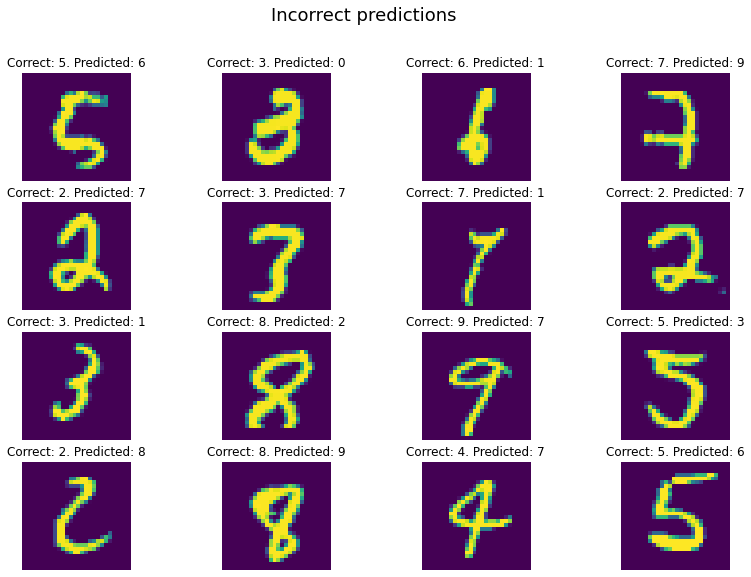

Accuracy of uniform KNN with 2 neighbors: 88.5 %. Fit in 0.4 s. Prediction in 214.5 s


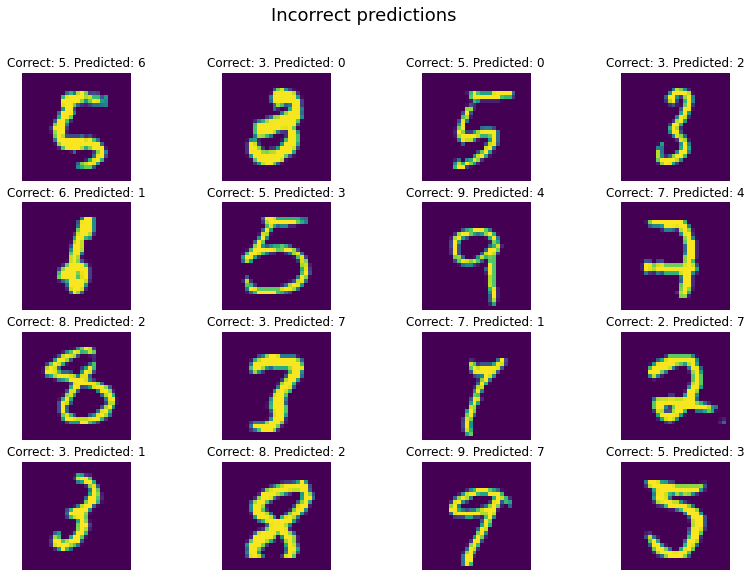

Accuracy of uniform KNN with 3 neighbors: 89.7 %. Fit in 0.5 s. Prediction in 228.0 s


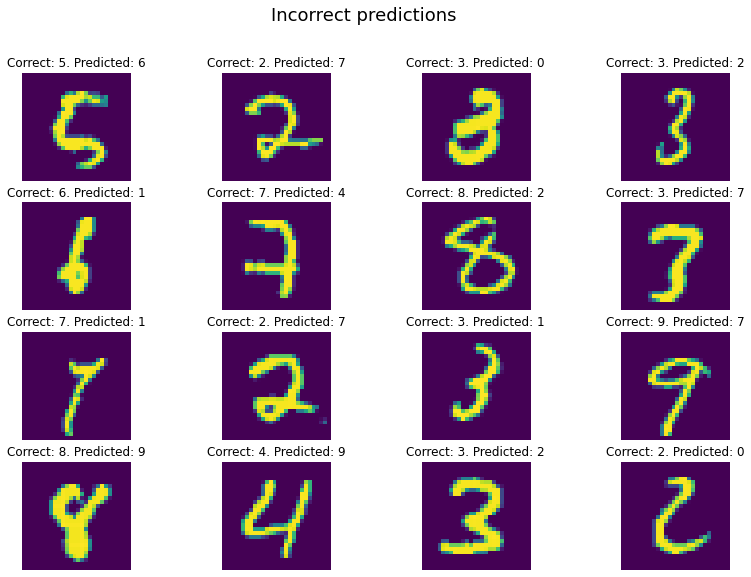

Accuracy of uniform KNN with 4 neighbors: 89.5 %. Fit in 0.5 s. Prediction in 227.0 s


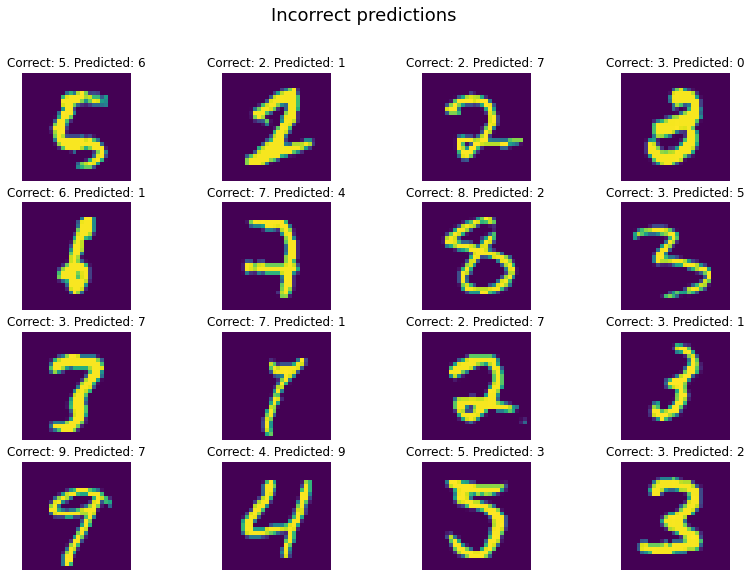

Accuracy of uniform KNN with 5 neighbors: 89.5 %. Fit in 0.5 s. Prediction in 228.3 s


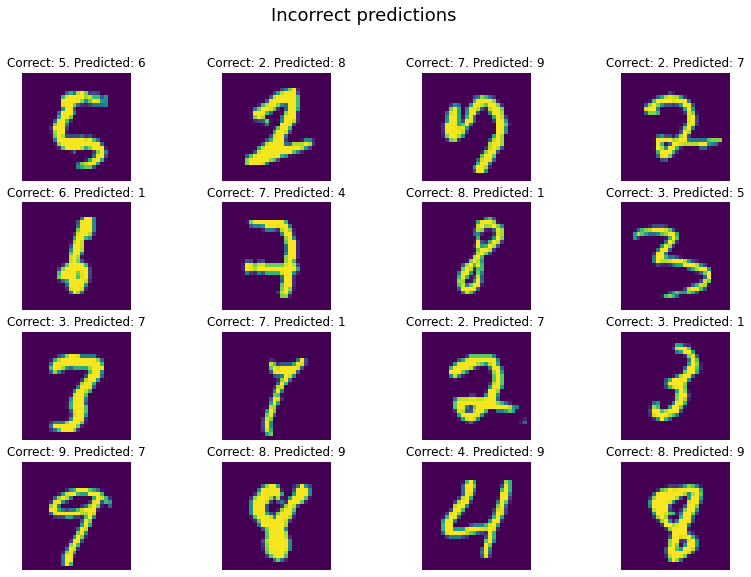

Accuracy of uniform KNN with 6 neighbors: 89.2 %. Fit in 0.6 s. Prediction in 227.0 s


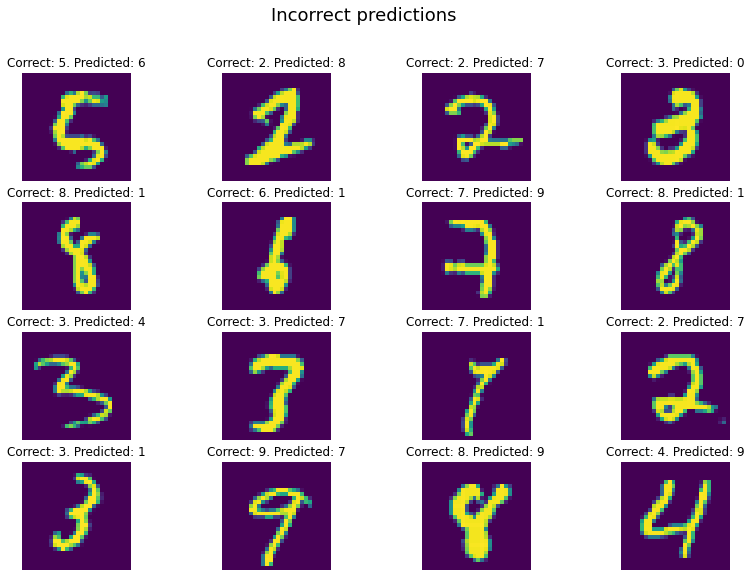

Accuracy of uniform KNN with 7 neighbors: 89.1 %. Fit in 0.5 s. Prediction in 226.0 s


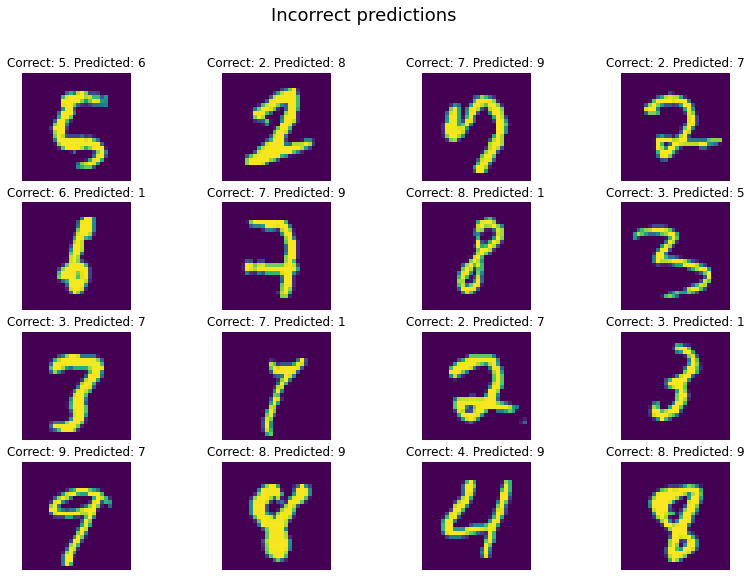

Accuracy of uniform KNN with 8 neighbors: 88.9 %. Fit in 0.5 s. Prediction in 238.7 s


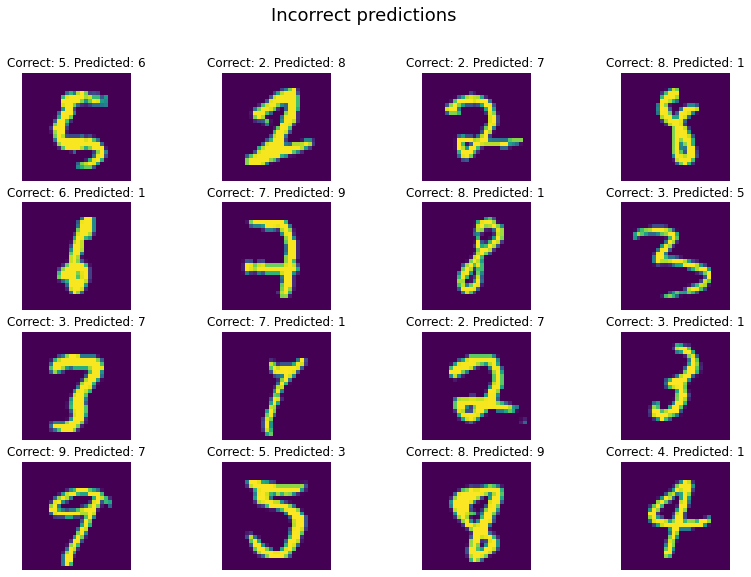

Accuracy of uniform KNN with 9 neighbors: 88.7 %. Fit in 0.5 s. Prediction in 228.1 s


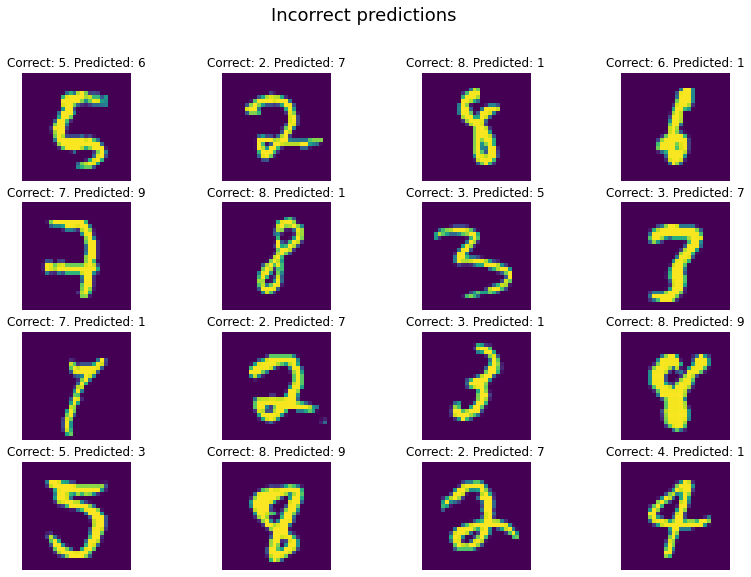

Accuracy of uniform KNN with 10 neighbors: 88.5 %. Fit in 0.6 s. Prediction in 227.2 s


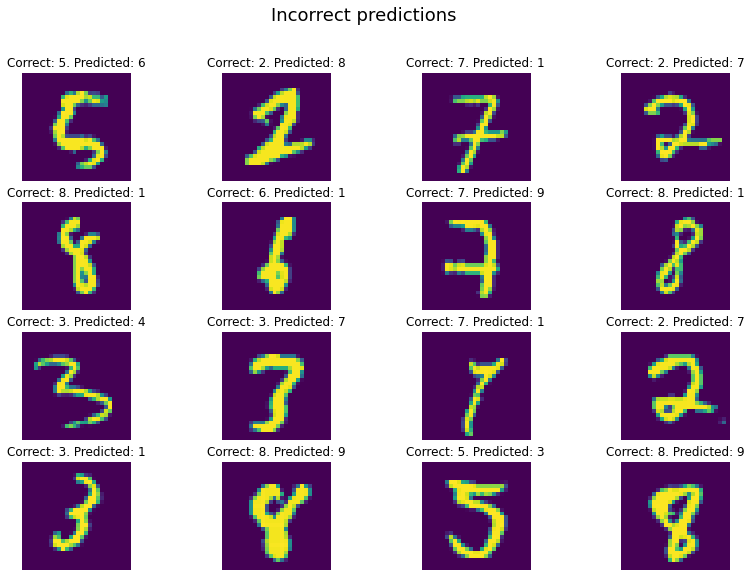

Accuracy of distance KNN with 1 neighbors: 90.0 %. Fit in 0.4 s. Prediction in 217.8 s


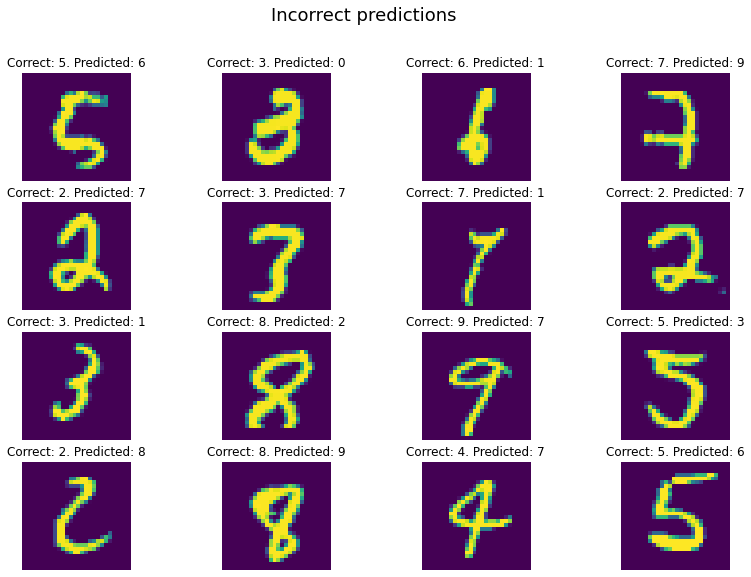

Accuracy of distance KNN with 2 neighbors: 90.0 %. Fit in 0.5 s. Prediction in 226.2 s


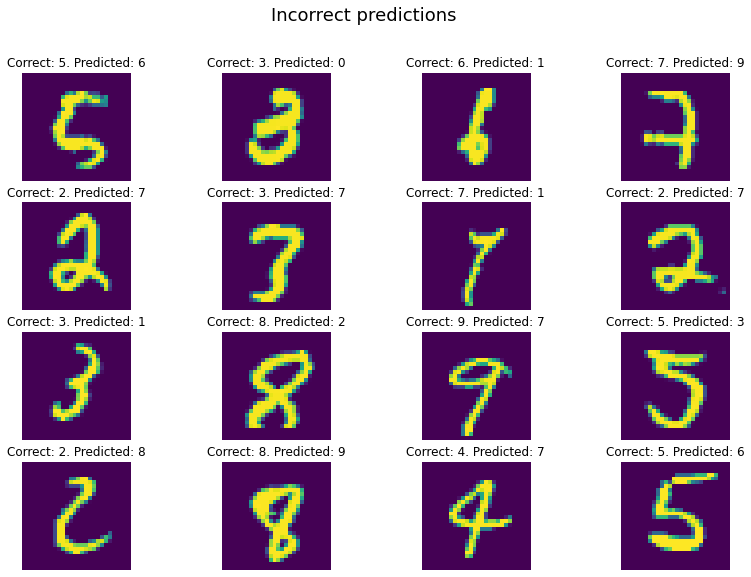

Accuracy of distance KNN with 3 neighbors: 90.3 %. Fit in 0.5 s. Prediction in 197.3 s


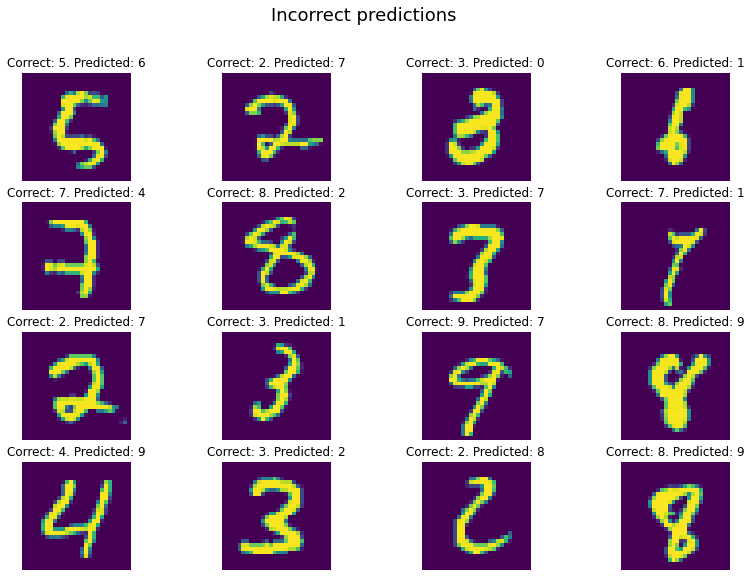

Accuracy of distance KNN with 4 neighbors: 90.5 %. Fit in 0.4 s. Prediction in 190.5 s


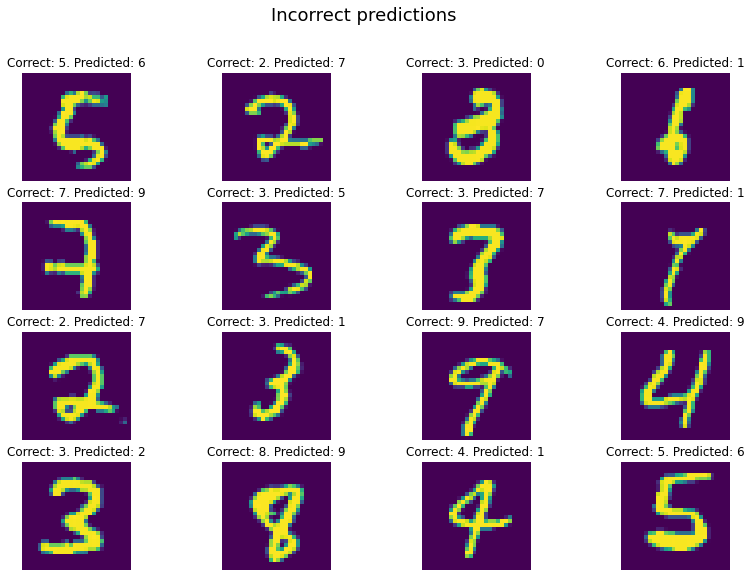

Accuracy of distance KNN with 5 neighbors: 90.1 %. Fit in 0.5 s. Prediction in 211.8 s


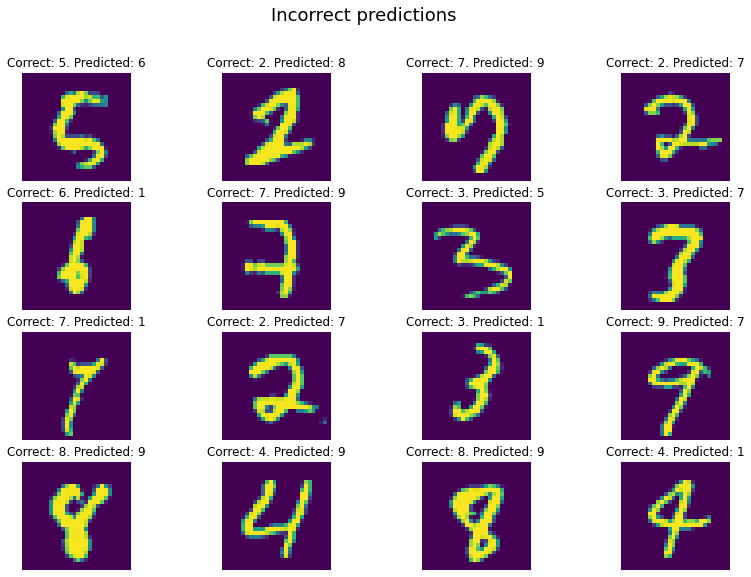

Accuracy of distance KNN with 6 neighbors: 90.1 %. Fit in 0.5 s. Prediction in 220.0 s


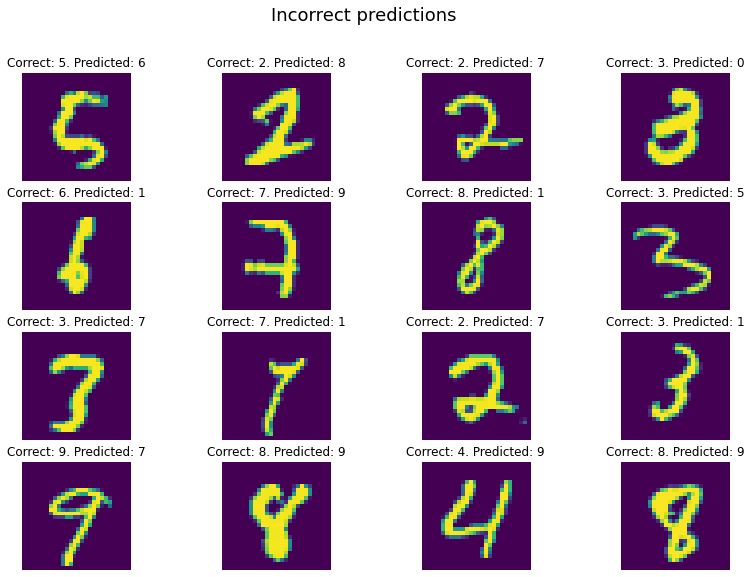

Accuracy of distance KNN with 7 neighbors: 89.6 %. Fit in 0.6 s. Prediction in 223.3 s


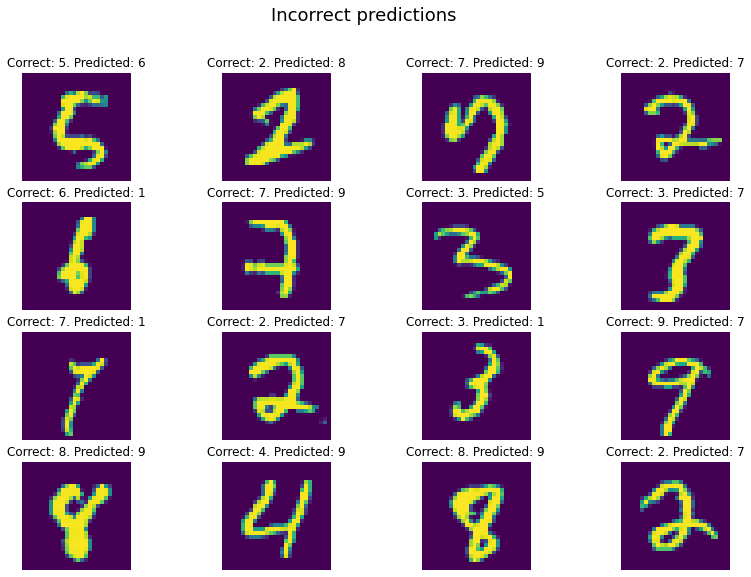

Accuracy of distance KNN with 8 neighbors: 89.6 %. Fit in 0.6 s. Prediction in 207.3 s


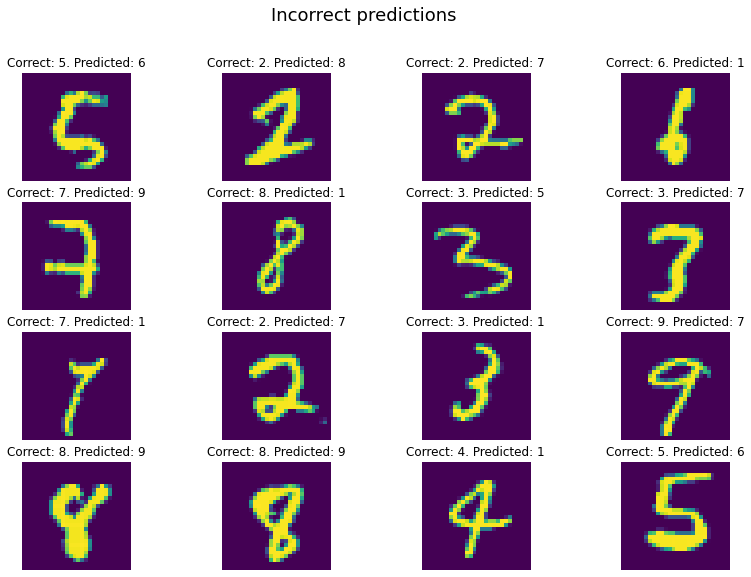

Accuracy of distance KNN with 9 neighbors: 89.2 %. Fit in 0.6 s. Prediction in 205.0 s


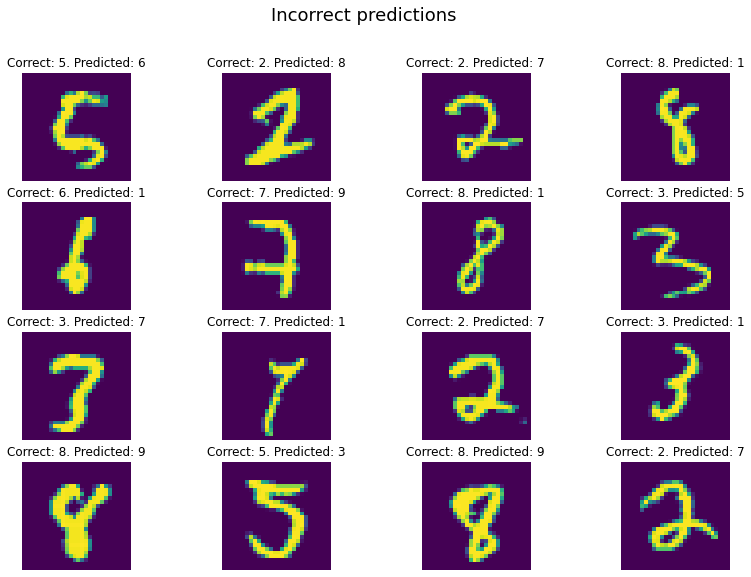

Accuracy of distance KNN with 10 neighbors: 89.2 %. Fit in 0.6 s. Prediction in 203.1 s


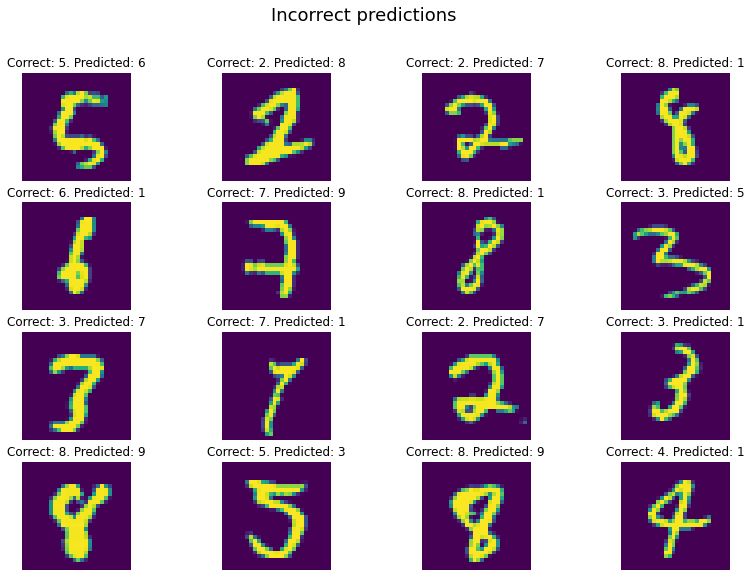

In [14]:
for weights in ['uniform', 'distance']:
  for n in range(1,11):
     lets_knn(x_train, y_train, x_test, y_test, n_neighbors=n, weights=weights, print_wrong_pred=True)